# The Metropolitan Museum of Art Open Access

## Framing the Problem

## Obtaining Data

### Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline

In [5]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 2000)

In [6]:
data = pd.read_csv('data.csv')

In [7]:
data.head()

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Object Name,Title,Culture,Period,Dynasty,Reign,Portfolio,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository
0,1979.486.1,False,False,1,American Decorative Arts,Coin,One-dollar Liberty Head Coin,NaN,NaN,NaN,NaN,NaN,Maker,NaN,James Barton Longacre,"American, Delaware County, Pennsylvania 1794–1...",NaN,"Longacre, James Barton",American,1794,1869,1853,1853,1853,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/1,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1,1980.264.5,False,False,2,American Decorative Arts,Coin,Ten-dollar Liberty Head Coin,NaN,NaN,NaN,NaN,NaN,Maker,NaN,Christian Gobrecht,1785–1844,NaN,"Gobrecht, Christian",NaN,1785,1844,1901,1901,1901,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1980",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
2,67.265.9,False,False,3,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/3,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
3,67.265.10,False,False,4,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/4,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
4,67.265.11,False,False,5,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/5,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 43 columns):
Object Number              1924 non-null object
Is Highlight               1924 non-null bool
Is Public Domain           1924 non-null bool
Object ID                  1924 non-null int64
Department                 1924 non-null object
Object Name                1924 non-null object
Title                      1924 non-null object
Culture                    1517 non-null object
Period                     0 non-null float64
Dynasty                    0 non-null float64
Reign                      0 non-null float64
Portfolio                  0 non-null float64
Artist Role                720 non-null object
Artist Prefix              269 non-null object
Artist Display Name        720 non-null object
Artist Display Bio         646 non-null object
Artist Suffix              9 non-null object
Artist Alpha Sort          719 non-null object
Artist Nationality         277 non-null object
Art

In [9]:
data.shape

(1924, 43)

## Analysing Data

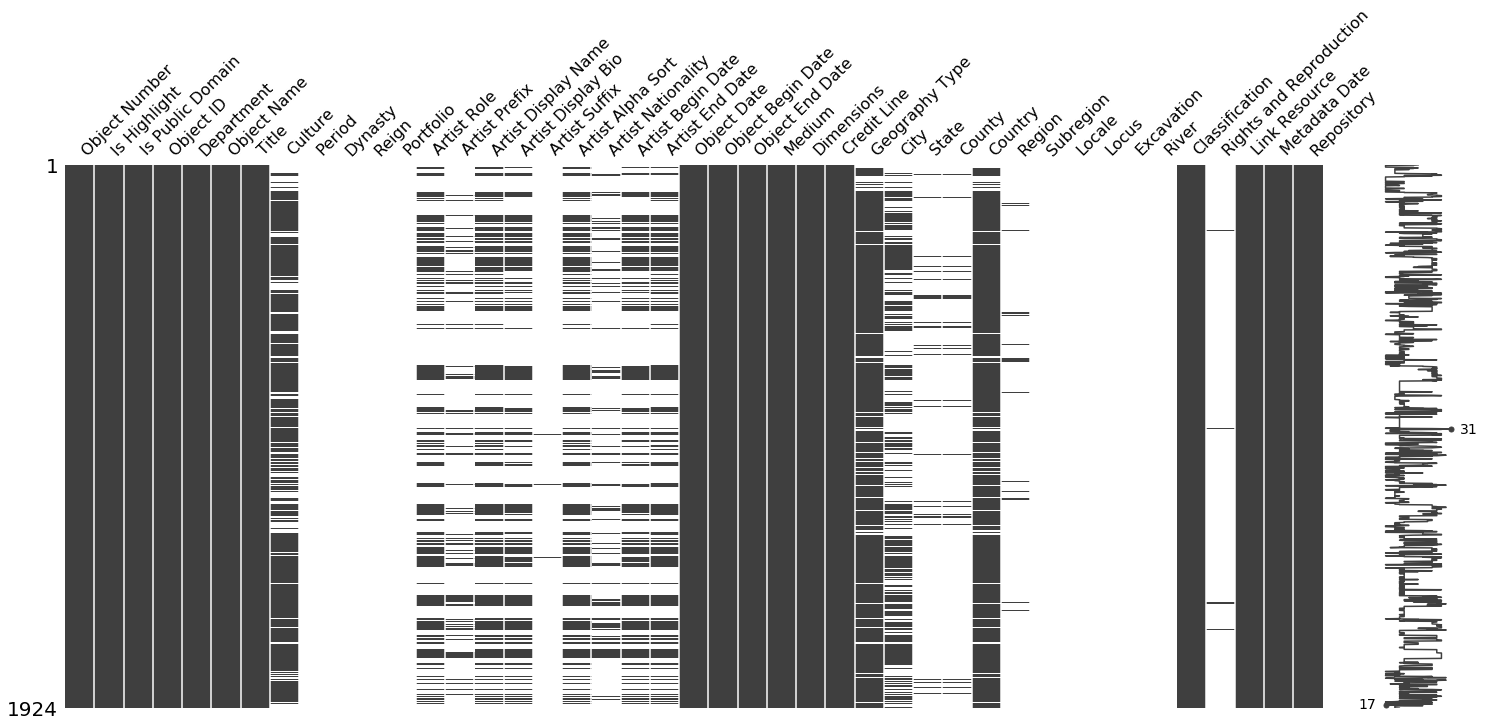

In [10]:
ms.matrix(data)

## Feature Engineering

### Filling Missing Values

#### Dropping Columns with no values 

In [11]:
data.drop(['Period', 'Dynasty', 'Reign','Portfolio','Subregion','Locale','Locus','Excavation','River'], axis=1, inplace=True)

#### Working with "Artist Suffix" Column [Sharukh]

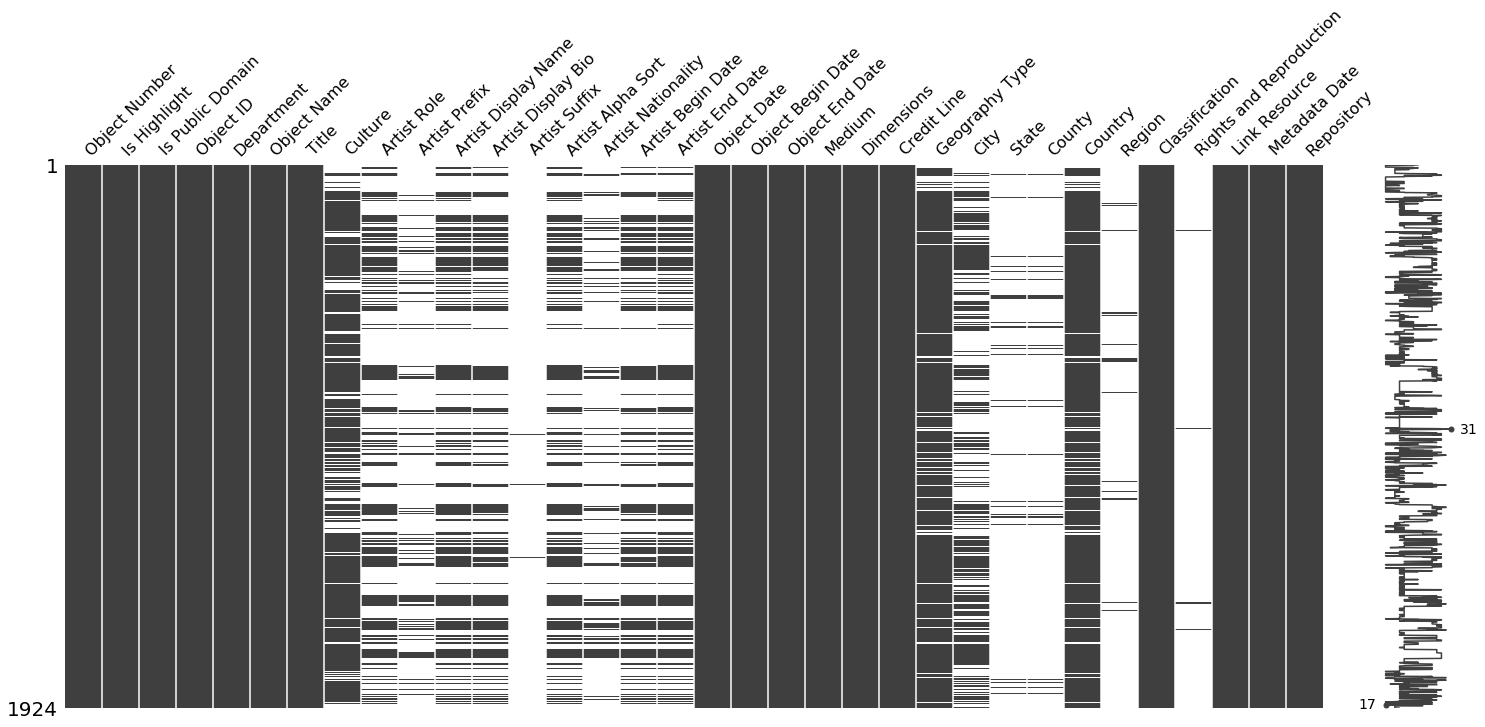

In [12]:
ms.matrix(data)

In [13]:
data['Artist Suffix'].value_counts()

or           8
Tradition    1
Name: Artist Suffix, dtype: int64

In [14]:
data.drop('Artist Suffix', axis=1, inplace=True)

#### Working with "Culture Columns" [Sarath]

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 33 columns):
Object Number              1924 non-null object
Is Highlight               1924 non-null bool
Is Public Domain           1924 non-null bool
Object ID                  1924 non-null int64
Department                 1924 non-null object
Object Name                1924 non-null object
Title                      1924 non-null object
Culture                    1517 non-null object
Artist Role                720 non-null object
Artist Prefix              269 non-null object
Artist Display Name        720 non-null object
Artist Display Bio         646 non-null object
Artist Alpha Sort          719 non-null object
Artist Nationality         277 non-null object
Artist Begin Date          645 non-null object
Artist End Date            701 non-null object
Object Date                1924 non-null object
Object Begin Date          1924 non-null int64
Object End Date            1924 non-null in

In [16]:
data['Culture'].value_counts()

American                        1188
Chinese, for American market      78
British                           70
American, Shaker                  30
Chinese                           24
British (American market)         22
Mexican                           21
British, probably                 21
American or British               14
American or French                 8
British, possibly                  6
British or Irish                   5
European                           5
French                             4
American, Japanese                 4
Bermudian, possibly                2
Dutch                              2
American, probably                 2
Spanish                            2
British or Flemish                 2
American or Irish                  1
Canadian                           1
Irish                              1
French, possibly                   1
Venezuelan                         1
German                             1
Dutch, probably                    1
N

In [17]:
data['Culture'].value_counts()

American                        1188
Chinese, for American market      78
British                           70
American, Shaker                  30
Chinese                           24
British (American market)         22
Mexican                           21
British, probably                 21
American or British               14
American or French                 8
British, possibly                  6
British or Irish                   5
European                           5
French                             4
American, Japanese                 4
Bermudian, possibly                2
Dutch                              2
American, probably                 2
Spanish                            2
British or Flemish                 2
American or Irish                  1
Canadian                           1
Irish                              1
French, possibly                   1
Venezuelan                         1
German                             1
Dutch, probably                    1
N

In [18]:
data.groupby(['Culture','Object Name']).count()

Object Number  \
Culture                      Object Name                                                         
American                     Advertisement                                                   1   
                             Ale glass                                                       2   
                             Andiron                                                        26   
                             Architectural elements                                          2   
                             Armchair                                                       89   
                             Astral lamp                                                     2   
                             Aviary                                                          1   
                             Baby's bottle                                                   1   
                             Baking dish                                                     1   
                             Balcony                                                         1   
                             Ball                                                            2   
                             Baluster                                                        7   
                             Banister-back armchair                                          1   
                             Banister-back chair                                             1   
                             Banjo clock                                                     3   
                             Bank                                                            1   
                             Baptismal bowl                                                  1   
                             Baptismal certificate                                           1   
                             Basin                                                          16   
                             Basin Stand                                                     3   
                             Basin stand                                                     1   
                             Basket                                                          2   
                             Beaker                                                         42   
                             Bean pot                                                        1   
                             Bedstead                                                        9   
                             Bell                                                            2   
                             Bell pull                                                       1   
                             Bellows                                                         1   
                             Bench                                                           5   
                             Berry dish                                                      1   
                             Betty lamp                                                      2   
                             Bible                                                           1   
                             Bill holder                                                     1   
                             Birdhouse                                                       1   
                             Birth and baptismal certificate, Fraktur                       13   
                             Birth certificate, Fraktur                                      2   
                             Birth, baptismal and marriage certificate, Fraktur              1   
                             Bitters bottle                                                  3   
                             Blotter                                                         2   
                             Blotter holders                   

In [19]:
data.set_index(data['Object Name'], inplace=True)

In [20]:
data['Culture'].fillna(method='ffill', inplace=True)
data['Culture'].fillna(method='bfill', inplace=True)

In [21]:
data.reset_index(drop=True, inplace=True)

In [22]:
data['Culture'].value_counts()

American                        1489
British                          104
Chinese, for American market      83
American, Shaker                  40
British (American market)         33
Mexican                           33
American or British               32
British, probably                 30
Chinese                           24
American or French                 9
British or Flemish                 6
British, possibly                  6
European                           5
French                             5
British or Irish                   5
American, Japanese                 4
Irish                              2
Bermudian, possibly                2
Dutch                              2
American, probably                 2
Spanish                            2
American or Irish                  1
Canadian                           1
Venezuelan                         1
French, possibly                   1
German                             1
Dutch, probably                    1
N

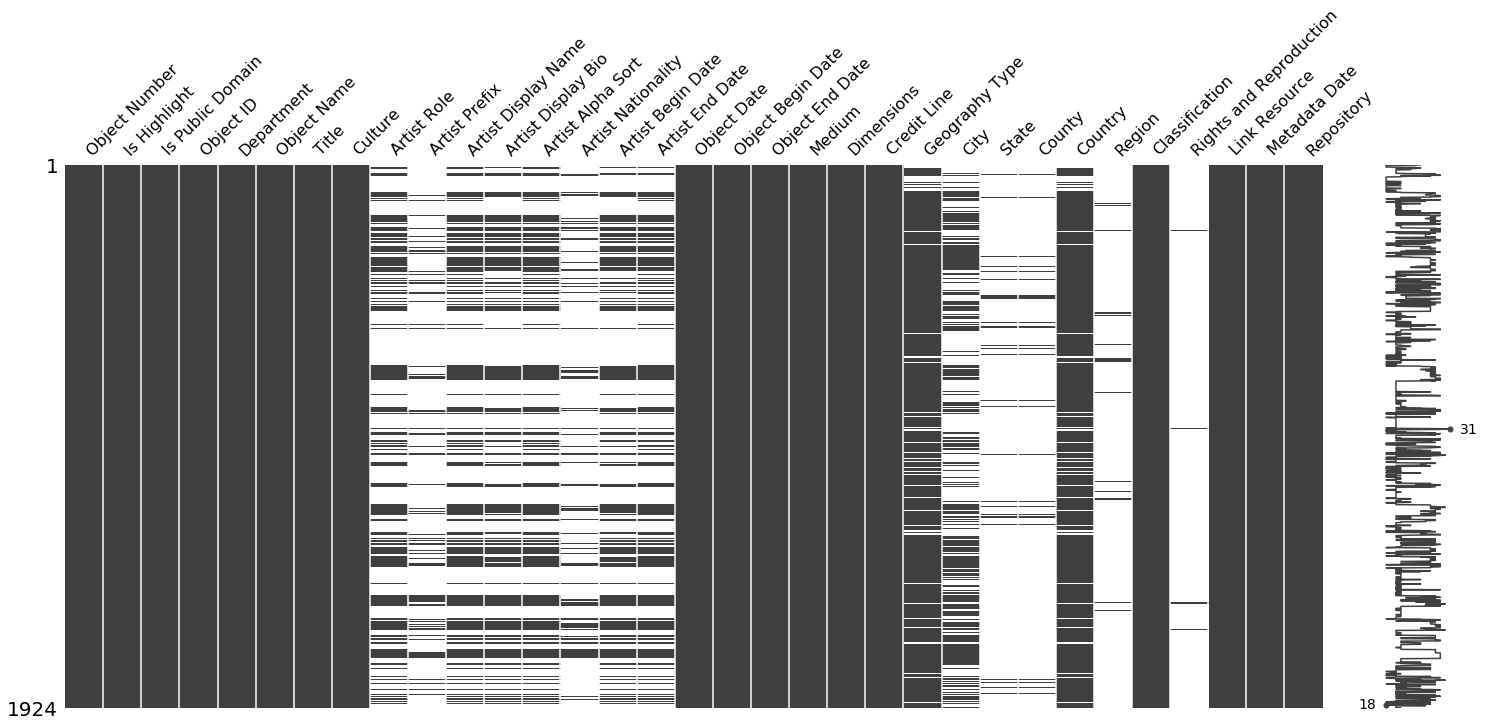

In [23]:
ms.matrix(data)

#### Working with "Artist Role" Column [Sarath]

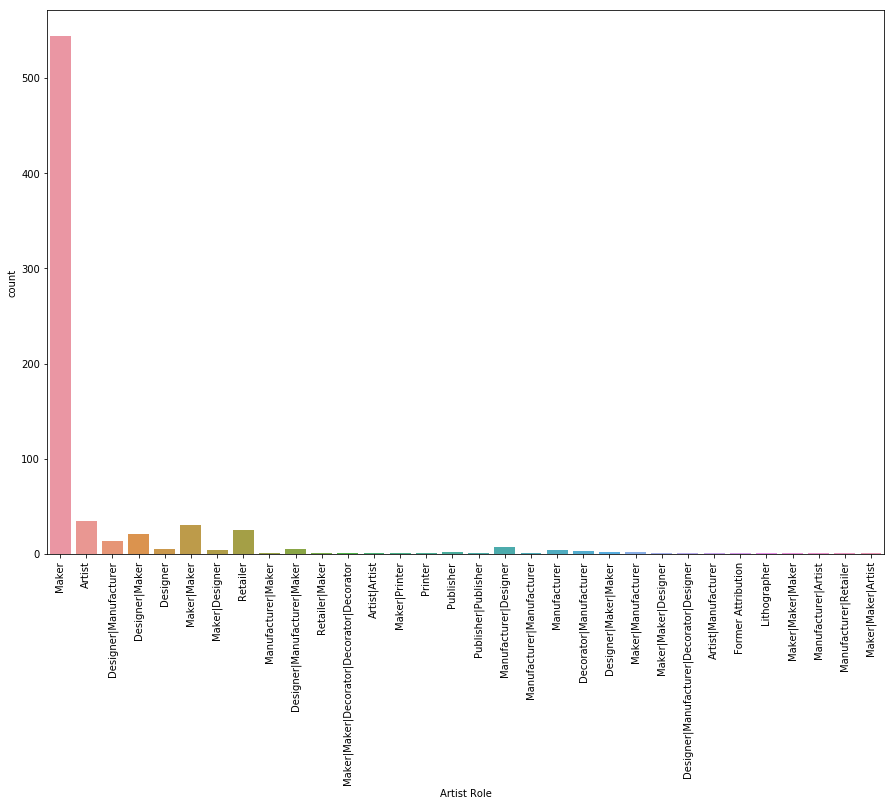

In [24]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(data['Artist Role'])

In [25]:
data.reset_index(drop=True, inplace=True)

In [26]:
data.drop('Artist Role',inplace=True, axis=1)

#### Working on "Country" Column [Sharukh]

In [27]:
data.set_index('Object Name',inplace=True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1924 entries, Coin to Clock
Data columns (total 31 columns):
Object Number              1924 non-null object
Is Highlight               1924 non-null bool
Is Public Domain           1924 non-null bool
Object ID                  1924 non-null int64
Department                 1924 non-null object
Title                      1924 non-null object
Culture                    1924 non-null object
Artist Prefix              269 non-null object
Artist Display Name        720 non-null object
Artist Display Bio         646 non-null object
Artist Alpha Sort          719 non-null object
Artist Nationality         277 non-null object
Artist Begin Date          645 non-null object
Artist End Date            701 non-null object
Object Date                1924 non-null object
Object Begin Date          1924 non-null int64
Object End Date            1924 non-null int64
Medium                     1924 non-null object
Dimensions                 1922 non-null obj

In [29]:
data.head(3)

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Title,Culture,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository
Object Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Coin,1979.486.1,False,False,1,American Decorative Arts,One-dollar Liberty Head Coin,American,NaN,James Barton Longacre,"American, Delaware County, Pennsylvania 1794–1...","Longacre, James Barton",American,1794,1869,1853,1853,1853,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/1,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
Coin,1980.264.5,False,False,2,American Decorative Arts,Ten-dollar Liberty Head Coin,American,NaN,Christian Gobrecht,1785–1844,"Gobrecht, Christian",NaN,1785,1844,1901,1901,1901,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1980",NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
Coin,67.265.9,False,False,3,American Decorative Arts,Two-and-a-Half Dollar Coin,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/3,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"


In [30]:
data['Country'].fillna(method='ffill',inplace=True)

In [31]:
data['Country'].fillna(method='bfill',inplace=True)

In [32]:
data.shape

(1924, 31)

In [33]:
data.head(10)

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Title,Culture,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository
Object Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Coin,1979.486.1,False,False,1,American Decorative Arts,One-dollar Liberty Head Coin,American,NaN,James Barton Longacre,"American, Delaware County, Pennsylvania 1794–1...","Longacre, James Barton",American,1794,1869,1853,1853,1853,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",NaN,NaN,NaN,NaN,Mexico,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/1,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
Coin,1980.264.5,False,False,2,American Decorative Arts,Ten-dollar Liberty Head Coin,American,NaN,Christian Gobrecht,1785–1844,"Gobrecht, Christian",NaN,1785,1844,1901,1901,1901,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1980",NaN,NaN,NaN,NaN,Mexico,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
Coin,67.265.9,False,False,3,American Decorative Arts,Two-and-a-Half Dollar Coin,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,Mexico,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/3,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
Coin,67.265.10,False,False,4,American Decorative Arts,Two-and-a-Half Dollar Coin,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,Mexico,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/4,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
Coin,67.265.11,False,False,5,American Decorative Arts,Two-and-a-Half Dollar Coin,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,Mexico,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/5,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
Coin,67.265.12,False,False,6,American Decorative Arts,Two-and-a-Half Dollar Coin,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,Mexico,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/6,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
Coin,67.265.13,False,False,7,American Decorative Arts,Two-and-a-Half Dollar Coin,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,Mexico,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/7,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
Coin,67.265.14,False,False,8,American Decorative Arts,Two-and-a-Half Dollar Coin,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,Mexico,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/8,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
Coin,67.265.15,False,False,9,American Decorative Arts,Two-and-a-Half Dollar Coin,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",NaN,NaN,NaN,NaN,Mexico,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/9,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"


#### Working on "Geography" Column [Sharukh]

In [34]:
data['Geography Type'].tail(3)

Object Name
Pin               Made in
Clock             Made in
Clock    Possibly made in
Name: Geography Type, dtype: object

In [35]:
data['Geography Type'].head(3)

Object Name
Coin    NaN
Coin    NaN
Coin    NaN
Name: Geography Type, dtype: object

In [36]:
data['Geography Type'].fillna(method='bfill', inplace=True)

In [37]:
data['Geography Type'].head(3)

Object Name
Coin    Made in
Coin    Made in
Coin    Made in
Name: Geography Type, dtype: object

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1924 entries, Coin to Clock
Data columns (total 31 columns):
Object Number              1924 non-null object
Is Highlight               1924 non-null bool
Is Public Domain           1924 non-null bool
Object ID                  1924 non-null int64
Department                 1924 non-null object
Title                      1924 non-null object
Culture                    1924 non-null object
Artist Prefix              269 non-null object
Artist Display Name        720 non-null object
Artist Display Bio         646 non-null object
Artist Alpha Sort          719 non-null object
Artist Nationality         277 non-null object
Artist Begin Date          645 non-null object
Artist End Date            701 non-null object
Object Date                1924 non-null object
Object Begin Date          1924 non-null int64
Object End Date            1924 non-null int64
Medium                     1924 non-null object
Dimensions                 1922 non-null obj

In [39]:
data.sort_values(by='Artist Begin Date', inplace=True)

In [40]:
data.set_index(data['Artist Begin Date'])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [41]:
data[data['Artist End Date'].isnull()]['Artist Begin Date'].value_counts()

1787    2
Name: Artist Begin Date, dtype: int64

#### Working on "Artist Begin Date" and "Artist End Date" Columns [Sarath]

In [42]:
data[data['Artist Begin Date'].isnull()]['Artist End Date'].value_counts()

9999               54
9999      |9999     4
Name: Artist End Date, dtype: int64

In [43]:
# def average_time_to_object(df):
#     artist_start = df[0]
#     object_start = df[1]
#     if
        

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1924 entries, Box to Clock
Data columns (total 31 columns):
Object Number              1924 non-null object
Is Highlight               1924 non-null bool
Is Public Domain           1924 non-null bool
Object ID                  1924 non-null int64
Department                 1924 non-null object
Title                      1924 non-null object
Culture                    1924 non-null object
Artist Prefix              269 non-null object
Artist Display Name        720 non-null object
Artist Display Bio         646 non-null object
Artist Alpha Sort          719 non-null object
Artist Nationality         277 non-null object
Artist Begin Date          645 non-null object
Artist End Date            701 non-null object
Object Date                1924 non-null object
Object Begin Date          1924 non-null int64
Object End Date            1924 non-null int64
Medium                     1924 non-null object
Dimensions                 1922 non-null obje

#### Working with "City", "State" and "County" Column [Sarath]

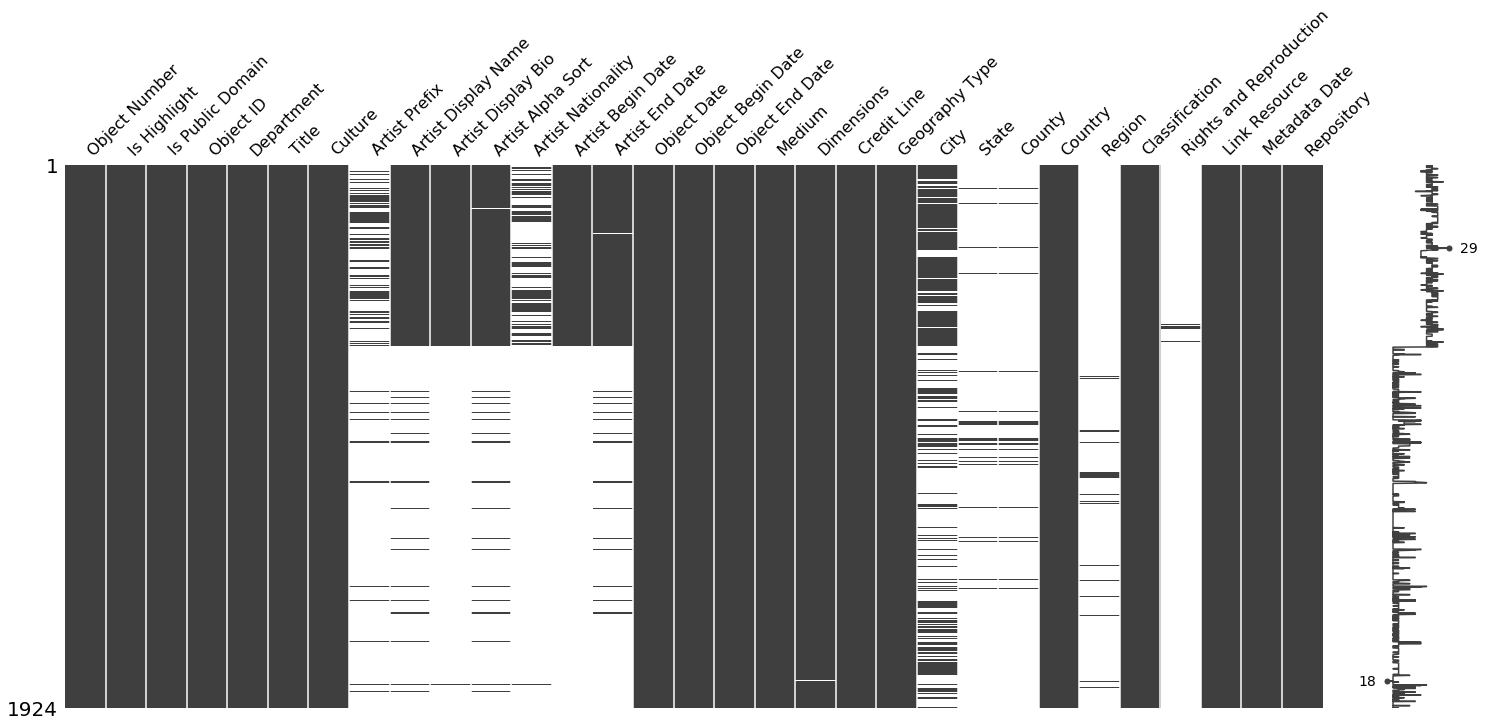

In [45]:
ms.matrix(data)

In [46]:
data.reset_index(drop=True, inplace=True)

In [47]:
data.head(5)

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Title,Culture,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository
0,10.125.680,False,True,945,American Decorative Arts,Box,American,Attributed to,John Thurston,1607–1685,"Thurston, John",NaN,1607,1685,1660–85,1660,1685,"White oak, red oak, yellow pine",9 1/2 x 26 5/8 x 15 1/2 in. (24.1 x 67.6 x 39....,"Gift of Mrs. Russell Sage, 1909",Possibly made in|Possibly made in,Dedham|Medfield,NaN,NaN,United States|United States,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1,10.125.685,True,True,1997,American Decorative Arts,Chest,American,Possibly,William Searle|Thomas Dennis,died 1667|1638–1706,"Searle, William|Dennis, Thomas",NaN,1611 |1638,1667 |1706,1663–80,1663,1680,"White oak, red oak",29 3/4 x 49 1/8 x 21 3/8 in. (75.6 x 124.8 x 5...,"Gift of Mrs. Russell Sage, 1909",Made in,Ipswich,NaN,NaN,United States,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
2,10.125.24,False,True,1989,American Decorative Arts,Chest,American,Attributed to,William Searle|the Searle-Dennis shop traditio...,died 1667|1638–1706,"Searle, William|Searle-Dennis, shop tradition|...",NaN,1611 |1638,1667 |1706,1670–90,1670,1690,"Red oak, white oak",28 1/2 x 41 7/8 x 19 3/4 in. (72.4 x 106.4 x 5...,"Gift of Mrs. Russell Sage, 1909",Made in,Ipswich,NaN,NaN,United States,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
3,2014.53,False,True,399,American Decorative Arts,Beaker,American,NaN,John Hull|Robert Sanderson Sr.,1624–1683|ca. 1608–1693,"Hull, John|Sanderson, Robert",NaN,1624 |1605,1683 |1693,ca. 1670,1667,1670,Silver,Overall: 5 3/8 in. (13.7 cm); 7 oz. 6 dwt. (22...,"Purchase, Bequest of Emma A. Sheafer, by excha...",Made in,Boston,NaN,NaN,United States,NaN,Silver,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
4,10.125.2,False,True,940,American Decorative Arts,Box,American,Attributed to,William Buell,died 1681,"Buell, William",NaN,1631,1681,1640–80,1640,1680,"Oak, pine",9 1/2 x 28 1/4 x 18 1/2 in. (24.1 x 71.8 x 47 cm),"Gift of Mrs. Russell Sage, 1909",Made in,Windsor,NaN,NaN,United States,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"


In [48]:
data['City'].value_counts()

New York                   262
Boston                      77
Philadelphia                77
Pittsburgh                  40
Bennington                  33
Bristol                     24
Chicago                     24
New Lebanon                 18
Sandwich                    17
Chelsea                     15
Baltimore                   15
Washington DC               14
Albany                      13
Providence                  12
Newport                     11
Salem                       11
Brooklyn                    11
Sheffield                   11
East Cambridge              10
Tarentum                    10
Portsmouth                   8
London                       7
Hartford                     7
Newark                       6
New York|Paris               6
Watervliet|New Lebanon       6
Wistarburg                   6
Birmingham                   5
Cincinnati                   5
Norwich                      5
Barnstable                   4
Beverly                      4
Wheeling

In [49]:
data[data['City'].isnull()].head(5)

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Title,Culture,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository
9,33.120.618,False,True,1408,American Decorative Arts,Capias,American,NaN,Edward Winslow,1669–1753,"Winslow, Edward",American,1669,1753,1718,1718,1718,Paper,12 1/2 x 7 7/8 in. (31.8 x 20 cm),"Bequest of Alphonso T. Clearwater, 1933",Made in,NaN,NaN,NaN,England|France,NaN,Natural Substances,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
13,10.125.689,False,True,2043,American Decorative Arts,Chest with Drawers,American,Workshop of,Peter Blin,ca. 1675–1725,"Blin, Peter",NaN,1672,1725,1675–1705,1675,1705,"Oak, pine, maple",39 1/4 x 47 1/2 x 22 in. (99.7 x 120.7 x 55.9 cm),"Gift of Mrs. Russell Sage, 1909",Made in,NaN,Wethersfield area,Wethersfield area,United States,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
14,66.190.1,False,True,2019,American Decorative Arts,Chest with drawers,American,Workshop of,Peter Blin,ca. 1675–1725,"Blin, Peter",NaN,1672,1725,1675–1700,1675,1700,"White oak, yellow pine, white cedar",39 7/8 x 48 x 21 1/4 in. (101.3 x 121.9 x 54 cm),"Gift of Mrs. J. Woodhull Overton, 1966",Made in,NaN,Wethersfield,Wethersfield,United States,NaN,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
21,"Inst.67.17.4a, b",False,False,1361,American Decorative Arts,Candlestick,British,NaN,Ebenezer Cocker,active ca. 1739,"Cocker, Ebenezer",NaN,1689,1789,1764–66,1764,1766,Silver,H. 10 3/8 in. (26.4 cm),"Gift of John C. Cattus, 1967",Made in,NaN,NaN,NaN,England,NaN,Silver,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
23,"Inst.67.17.2a, b",False,False,1359,American Decorative Arts,Candlestick,British,NaN,Ebenezer Cocker,active ca. 1739,"Cocker, Ebenezer",NaN,1689,1789,1764–66,1764,1766,Silver,H. 10 3/8 in. (26.4 cm),"Gift of John C. Cattus, 1967",Made in,NaN,NaN,NaN,England,NaN,Silver,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"


In [50]:
data[['City', 'State']].head(5)

,City,State
0,Dedham|Medfield,NaN
1,Ipswich,NaN
2,Ipswich,NaN
3,Boston,NaN
4,Windsor,NaN


In [51]:
len(data[(data['City'].isnull()) & (data['State'].isnull()) & (data['County'].isnull())])

951

In [52]:
data.drop(['City', 'State', 'County', 'Region'], axis=1, inplace=True)

#### Working with "Artsit Nationality" Column [Sharukh]

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 27 columns):
Object Number              1924 non-null object
Is Highlight               1924 non-null bool
Is Public Domain           1924 non-null bool
Object ID                  1924 non-null int64
Department                 1924 non-null object
Title                      1924 non-null object
Culture                    1924 non-null object
Artist Prefix              269 non-null object
Artist Display Name        720 non-null object
Artist Display Bio         646 non-null object
Artist Alpha Sort          719 non-null object
Artist Nationality         277 non-null object
Artist Begin Date          645 non-null object
Artist End Date            701 non-null object
Object Date                1924 non-null object
Object Begin Date          1924 non-null int64
Object End Date            1924 non-null int64
Medium                     1924 non-null object
Dimensions                 1922 non-null ob

In [93]:
data[['Artist Nationality', 'Country']]

,Artist Nationality,Country
0,American,United States|United States
1,American,United States
2,American,United States
3,American,United States
4,American,United States
5,American,United States
6,American,United States
7,American,United States
8,American,United States
9,British,England|France


In [83]:
data['Country'].unique()

data.is_copy = False

In [89]:
Nationality = data['Artist Nationality']
Object_Origin = data['Country']

Nationality.is_copy = False
Object_Origin.is_copy = False

In [96]:
import math

j = 0

for i in Nationality:  
    if type(i) == float:
        if math.isnan(i) == True:
            if Object_Origin[j] == 'United States' or Object_Origin[j] == 'United States|United States':
                Nationality[j] = 'American'
            elif Object_Origin[j] == 'England|France':
                Nationality[j] = 'British'
            elif Object_Origin[j] == 'England':
                Nationality[j] = 'British'
            elif Object_Origin[j] == 'France':
                Nationality[j] = 'French'
            elif Object_Origin[j] == 'Italy':
                Nationality[j] = 'Italian'
            elif Object_Origin[j] == 'Japan':
                Nationality[j] = 'Japanese'
            elif Object_Origin[j] == 'Mexico':
                Nationality[j] = 'Mexican'
            elif Object_Origin[j] == 'Germany':
                Nationality[j] = 'German'
            elif Object_Origin[j] == 'Canada':
                Nationality[j] = 'Canadian'
            elif Object_Origin[j] == 'United States|France':
                Nationality[j] = 'French'
            elif Object_Origin[j] == 'Venezuela':
                Nationality[j] = 'Venezuelian'
            elif Object_Origin[j] == 'Netherlands':
                Nationality[j] = 'Dutch'
            elif Object_Origin[j] == 'Guatemala':
                Nationality[j] = 'Ladino'
            elif Object_Origin[j] == 'Spain':
                Nationality[j] = 'Spanish'
            elif Object_Origin[j] == 'United States|England':
                Nationality[j] = 'British'
            elif Object_Origin[j] == 'China':
                Nationality[j] = 'Chinese'
            elif Object_Origin[j] == 'Netherlands|Netherlands':
                Nationality[j] = 'Dutch'
            elif Object_Origin[j] == 'Czech Republic':
                Nationality[j] = 'Czech'
            elif Object_Origin[j] == 'England|Ireland':
                Nationality[j] = 'Scottish'
            elif Object_Origin[j] == 'Bermuda':
                Nationality[j] = 'Bermudian'
            elif Object_Origin[j] == 'India':
                Nationality[j] = 'Indian'
            elif Object_Origin[j] == 'Ireland|United States':
                Nationality[j] = 'Scottish'
            elif Object_Origin[j] == 'Ireland':
                Nationality[j] = 'Scottish'
            elif Object_Origin[j] == 'England|Netherlands':
                Nationality[j] = 'British'
            elif Object_Origin[j] == 'England|Belgium':
                Nationality[j] = 'Dutch'
            elif Object_Origin[j] == 'France|Italy':
                Nationality[j] = 'French'
    j = j+1

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [97]:
data['Artist Nationality'] = Nationality
data['Country'] = Object_Origin

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 27 columns):
Object Number              1924 non-null object
Is Highlight               1924 non-null bool
Is Public Domain           1924 non-null bool
Object ID                  1924 non-null int64
Department                 1924 non-null object
Title                      1924 non-null object
Culture                    1924 non-null object
Artist Prefix              269 non-null object
Artist Display Name        720 non-null object
Artist Display Bio         646 non-null object
Artist Alpha Sort          719 non-null object
Artist Nationality         1924 non-null object
Artist Begin Date          645 non-null object
Artist End Date            701 non-null object
Object Date                1924 non-null object
Object Begin Date          1924 non-null int64
Object End Date            1924 non-null int64
Medium                     1924 non-null object
Dimensions                 1922 non-null o

### Working with columns relating to Artist Meta Data [Sharukh]

In [106]:
data.

0                                          Thurston, John
1                          Searle, William|Dennis, Thomas
2       Searle, William|Searle-Dennis, shop tradition|...
3                            Hull, John|Sanderson, Robert
4                                          Buell, William
5                                      Blanck, Jr. Jurian
6                                             Coney, John
7                                           Boelen, Jacob
8                                              Kip, Jesse
9                                         Winslow, Edward
10                                        Winslow, Edward
11                                        Winslow, Edward
12                                        Winslow, Edward
13                                            Blin, Peter
14                                            Blin, Peter
15                                   Kierstede, Cornelius
16                                   Kierstede, Cornelius
17            

In [102]:
data

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [103]:
data.head()

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Title,Culture,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,Country,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository
0,10.125.680,False,True,945,American Decorative Arts,Box,American,Attributed to,John Thurston,1607–1685,"Thurston, John",American,1607,1685,1660–85,1660,1685,"White oak, red oak, yellow pine",9 1/2 x 26 5/8 x 15 1/2 in. (24.1 x 67.6 x 39....,"Gift of Mrs. Russell Sage, 1909",Possibly made in|Possibly made in,United States|United States,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
1,10.125.685,True,True,1997,American Decorative Arts,Chest,American,Possibly,William Searle|Thomas Dennis,died 1667|1638–1706,"Searle, William|Dennis, Thomas",American,1611 |1638,1667 |1706,1663–80,1663,1680,"White oak, red oak",29 3/4 x 49 1/8 x 21 3/8 in. (75.6 x 124.8 x 5...,"Gift of Mrs. Russell Sage, 1909",Made in,United States,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
2,10.125.24,False,True,1989,American Decorative Arts,Chest,American,Attributed to,William Searle|the Searle-Dennis shop traditio...,died 1667|1638–1706,"Searle, William|Searle-Dennis, shop tradition|...",American,1611 |1638,1667 |1706,1670–90,1670,1690,"Red oak, white oak",28 1/2 x 41 7/8 x 19 3/4 in. (72.4 x 106.4 x 5...,"Gift of Mrs. Russell Sage, 1909",Made in,United States,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
3,2014.53,False,True,399,American Decorative Arts,Beaker,American,NaN,John Hull|Robert Sanderson Sr.,1624–1683|ca. 1608–1693,"Hull, John|Sanderson, Robert",American,1624 |1605,1683 |1693,ca. 1670,1667,1670,Silver,Overall: 5 3/8 in. (13.7 cm); 7 oz. 6 dwt. (22...,"Purchase, Bequest of Emma A. Sheafer, by excha...",Made in,United States,Silver,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
4,10.125.2,False,True,940,American Decorative Arts,Box,American,Attributed to,William Buell,died 1681,"Buell, William",American,1631,1681,1640–80,1640,1680,"Oak, pine",9 1/2 x 28 1/4 x 18 1/2 in. (24.1 x 71.8 x 47 cm),"Gift of Mrs. Russell Sage, 1909",Made in,United States,Furniture,NaN,http://www.metmuseum.org/art/collection/search...,5/14/2018 8:00:02 AM,"Metropolitan Museum of Art, New York, NY"
